In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
sns.set(style="whitegrid")

In [6]:
diabetes_data=pd.read_csv("diabetes (2).csv")
recipes_df=pd.read_csv("IndianFoodDataset (6).csv")

In [7]:
print("Diabetes Data:")
print(diabetes_data.head())
print("\nRecipes Data:")
print(recipes_df.head())

Diabetes Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Recipes Data:
   Srno                                         RecipeName  \
0     1                               Masala Karela Recipe   
1     2  टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...   
2     3  Ragi Semiya Upma Recipe - Ragi Millet Vermicel...   
3     4  Gongura Chicken 

In [8]:
print("\nNull values in Diabetes Data:")
print(diabetes_data.isnull().sum())
print("\nNull values in Recipes Data:")
print(recipes_df.isnull().sum())


Null values in Diabetes Data:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Null values in Recipes Data:
Srno                      0
RecipeName                0
TranslatedRecipeName      0
Ingredients               6
TranslatedIngredients     6
PrepTimeInMins            0
CookTimeInMins            0
TotalTimeInMins           0
Servings                  0
Cuisine                   0
Course                    0
Diet                      0
Instructions              0
TranslatedInstructions    0
URL                       0
dtype: int64


In [9]:
recipes_df = recipes_df[["RecipeName", "Diet", "TotalTimeInMins", "Cuisine"]]


In [10]:
recipes_df["Diet"] = recipes_df["Diet"].str.strip().str.lower()

In [11]:
diabetes_data.fillna(0, inplace=True)

In [12]:
diabetes_data["Outcome"] = diabetes_data["Outcome"].astype(int)

In [13]:
print("Cleaned Diabetes Data:")
print(diabetes_data.info())
print("\nCleaned Recipes Data:")
print(recipes_df.info())

Cleaned Diabetes Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Cleaned Recipes Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  

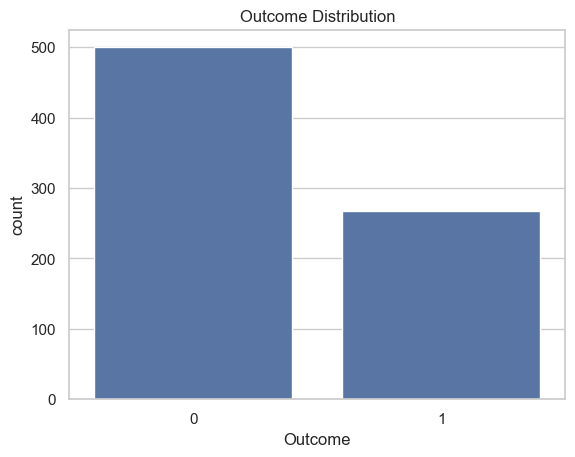

In [14]:
sns.countplot(x="Outcome", data=diabetes_data)
plt.title("Outcome Distribution")
plt.show()

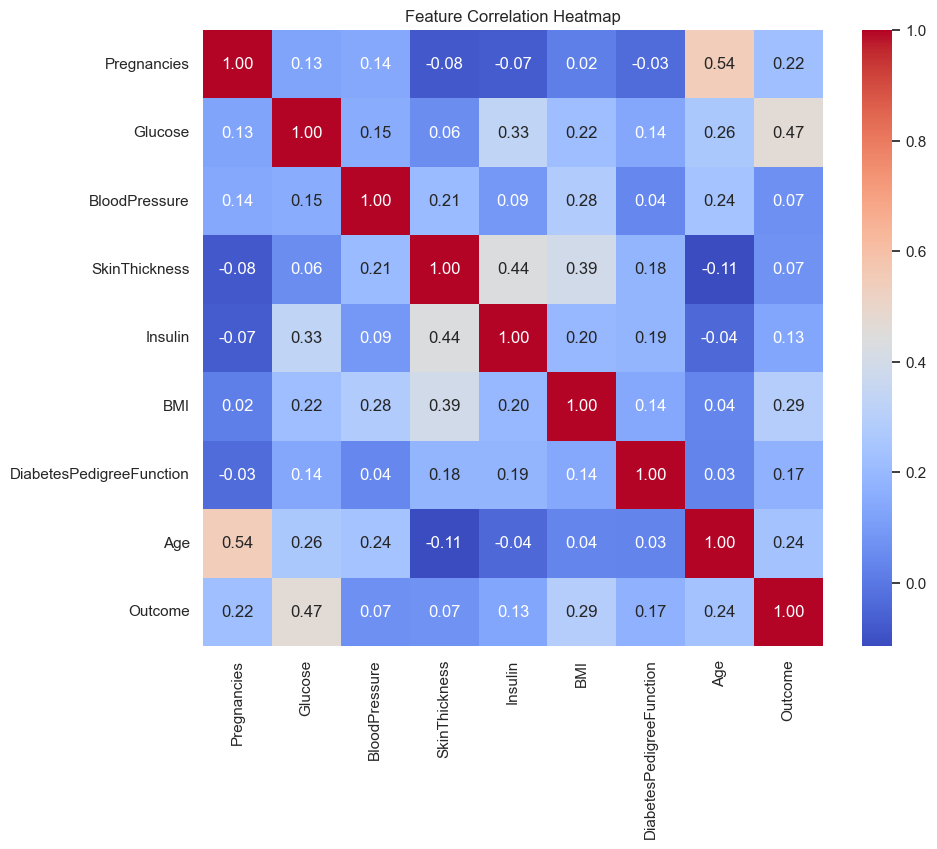

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
features = ["Glucose", "BMI", "Age"]
target = "Outcome"

In [17]:
X = diabetes_data[features]
y = diabetes_data[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 614, Testing samples: 154


In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.08%


In [22]:
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

In [23]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [24]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [25]:
best_model = grid_search.best_estimator_

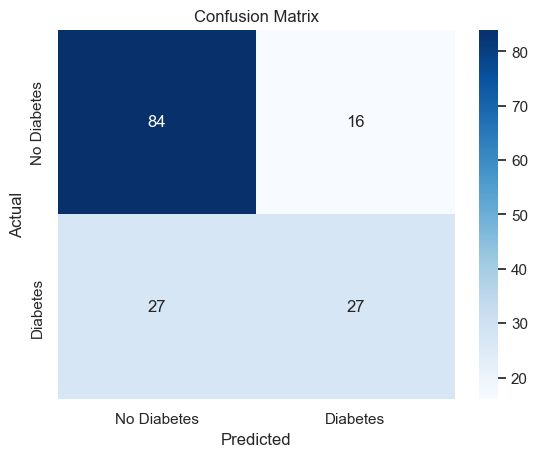

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [31]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

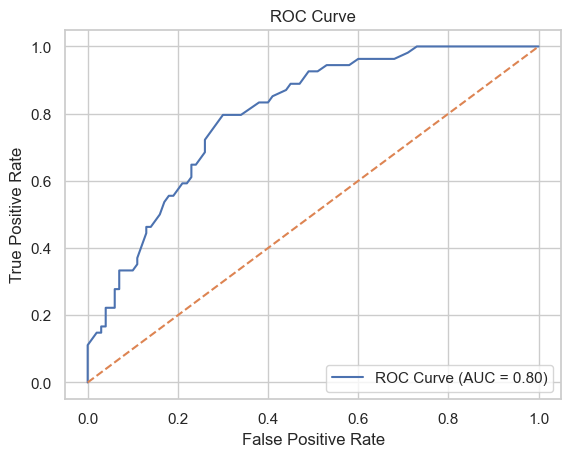

In [32]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [33]:
sample = pd.DataFrame([[120, 25, 30]], columns=features) 
predicted_outcome = model.predict(sample)[0]

In [34]:
if predicted_outcome == 1: 
    recommended_recipes = recipes_df[recipes_df["Diet"] == "diabetic friendly"]
else: 
    recommended_recipes = recipes_df[recipes_df["Diet"].isin(["vegetarian", "non vegetarian", "vegan"])]

print("Recommended Recipes:")
print(recommended_recipes.head())

Recommended Recipes:
                                          RecipeName        Diet  \
1  टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...  vegetarian   
4  आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...  vegetarian   
6         Udupi Style Ash Gourd Coconut Curry Recipe  vegetarian   
7            Mexican Style Black Bean Burrito Recipe  vegetarian   
8                   Spicy Crunchy Masala Idli Recipe  vegetarian   

   TotalTimeInMins               Cuisine  
1               15  South Indian Recipes  
4               30                Andhra  
6               40                 Udupi  
7               40               Mexican  
8               30  South Indian Recipes  


In [35]:
import joblib

joblib.dump(best_model, "optimized_random_forest.pkl")
print("Model saved successfully!")

Model saved successfully!


In [43]:
cardio_data=pd.read_csv('cardio_train.csv')

In [51]:
cardio_data.columns

Index(['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'], dtype='object')

In [53]:
new_cardio=pd.read_csv('cardio_train.csv',delimiter=';')

In [55]:
new_csv="mod_cardio.csv"

In [57]:
new_cardio.to_csv(new_csv,index=False)

In [61]:
cardio_ele=pd.read_csv('mod_cardio.csv')

In [64]:
cardio_ele['age']=cardio_ele['age']//365

In [66]:
cardio_ele['Age']=cardio_ele['age']

In [82]:
cardio_ele['BMI']=cardio_ele['weight']/((cardio_ele['height']/100)**2)

In [84]:
cardio_ele['BMI']=cardio_ele['BMI'].map(lambda x:f"{x:.1f}")

In [72]:
print(diabetes_data['BMI'])

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


In [86]:
print(cardio_ele['BMI'])

0        22.0
1        34.9
2        23.5
3        28.7
4        23.0
         ... 
69995    26.9
69996    50.5
69997    31.4
69998    27.1
69999    24.9
Name: BMI, Length: 70000, dtype: object


In [92]:
merged_data=pd.merge(diabetes_data,cardio_ele,on=['Age','BMI'],how='inner')

In [90]:
cardio_ele['BMI'] =cardio_ele['BMI'].astype(float)


In [94]:
merged_data.fillna(0,inplace=True)

In [96]:
from sklearn.preprocessing import LabelEncoder

In [98]:
le=LabelEncoder()

In [100]:
print(merged_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'id', 'age',
       'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [102]:
merged_data['gender']=le.fit_transform(merged_data['gender'])

In [104]:
merged_data['Systolic_BP']=merged_data['ap_hi']

In [106]:
merged_data['Diastolic_BP']=merged_data['ap_lo']

In [108]:
print(merged_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'id', 'age',
       'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


In [144]:
X = merged_data[['Glucose', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'cholesterol', 'Age', 'gender']]
y = merged_data['Outcome']  # For Diabetes Prediction

In [146]:
y_cardio = merged_data['cardio']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
diabetes_model = RandomForestClassifier(n_estimators=100, random_state=42)
diabetes_model.fit(X_train, y_train)
y_pred = diabetes_model.predict(X_test)

In [152]:
print(f"Diabetes Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Diabetes Classification Report:")
print(classification_report(y_test, y_pred))

Diabetes Model Accuracy: 98.23%
Diabetes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       194
           1       0.99      0.98      0.98       202

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



In [154]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cardio, test_size=0.2, random_state=42)
cardio_model = RandomForestClassifier(n_estimators=100, random_state=42)
cardio_model.fit(X_train_c, y_train_c)
y_pred_c = cardio_model.predict(X_test_c)

In [156]:
print(f"Cardio Model Accuracy: {accuracy_score(y_test_c, y_pred_c) * 100:.2f}%")
print("Cardio Classification Report:")
print(classification_report(y_test_c, y_pred_c))

Cardio Model Accuracy: 72.73%
Cardio Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       199
           1       0.71      0.76      0.73       197

    accuracy                           0.73       396
   macro avg       0.73      0.73      0.73       396
weighted avg       0.73      0.73      0.73       396



In [158]:
joblib.dump(diabetes_model, 'diabetes_model.pkl')
joblib.dump(cardio_model, 'cardio_model.pkl')

['cardio_model.pkl']

In [160]:
print(merged_data['cholesterol'])

0       1
1       1
2       1
3       1
4       3
       ..
1974    1
1975    1
1976    2
1977    1
1978    3
Name: cholesterol, Length: 1979, dtype: int64


In [164]:
print(recipes_df.columns)

Index(['RecipeName', 'Diet', 'TotalTimeInMins', 'Cuisine'], dtype='object')
